##Descrição do Problema: Como estão as tendências de habilidades em demanda para analistas de dados?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [2]:
#Leitura do dataset

dados = pd.read_csv('/Users/geraldocangondo/Desktop/Data_Analise/Proj_Skill_Demand/data_jobs.csv')
dados.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


Agrupar as habilidades por mês
Selecionar apenas as ofertas de emprego que são para Analistas de Dados e o país do emprego é os Estados Unidos. Em seguida, extraia o mês da data de publicação de cada emprego para ver quando os empregos são listados. Em seguida, converte uma coluna que lista as habilidades em um formato de lista utilizável. Por fim, ele reorganiza os dados para que cada habilidade da lista tenha sua própria linha.

In [3]:
data_DA_EUA = dados[(dados['job_title'] == "Data Analyst") & (dados['job_country'] == "United States")].copy()

In [4]:
data_DA_EUA['job_skills'].isna().sum()

1795

In [5]:
data_DA_EUA['job_skills'].isnull().sum()

1795

In [6]:
data_DA_EUA['job_skills'] = data_DA_EUA['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

data_DA_EUA['job_skills'] = data_DA_EUA['job_skills'].apply(lambda x: x if isinstance(x, list) else [])

In [7]:
data_DA_EUA['job_posted_date'] = pd.to_datetime(data_DA_EUA['job_posted_date'], errors='coerce')

In [8]:
data_DA_EUA['job_posted_month_no'] = data_DA_EUA['job_posted_date'].dt.month

In [9]:
data_DA_EUA_explode = data_DA_EUA.explode('job_skills')
data_DA_EUA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN,11
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,sql,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,python,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,unix,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,excel,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,databricks,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,tableau,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,excel,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7


Criar uma tabela dinâmica a partir do df_DA_US_explode, definindo 'month' como o índice, job_skills como as colunas e preencher as entradas ausentes com zero.

In [10]:
data_DA_EUA_pivot = data_DA_EUA_explode.pivot_table(index="job_posted_month_no", columns='job_skills', aggfunc='size', fill_value=0)
data_DA_EUA_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


Ele adiciona uma nova linha rotulada Total que soma as contagens em todos os meses para cada habilidade. Por fim, ele reordena as colunas com base nas contagens totais, exibindo-as da maior para a menor, e mostra a tabela dinâmica atualizada.

In [11]:
data_DA_EUA_pivot.loc['Total'] = data_DA_EUA_pivot.sum()
data_DA_EUA_pivot = data_DA_EUA_pivot[data_DA_EUA_pivot.loc['Total'].sort_values(ascending=False).index]
data_DA_EUA_pivot = data_DA_EUA_pivot.drop('Total')
data_DA_EUA_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [12]:
#Plote as Contagens Mensais de Habilidades
#Ploque um gráfico de linhas das 5 principais habilidades para analistas 
#de dados, indexadas por mês. Ele seleciona as cinco primeiras colunas e as plota.

<Figure size 1400x900 with 0 Axes>

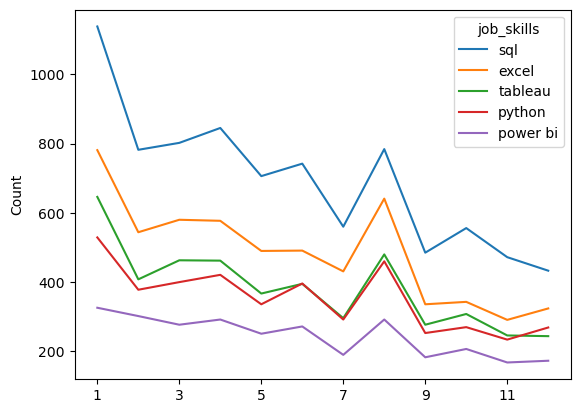

In [13]:
plt.figure(figsize=(14, 9))
data_DA_EUA_pivot.iloc[:,:5].plot(kind='line')
plt.ylabel('Count')
plt.xlabel('')
plt.show;

Calcular porcentagem do total de empregos
Calcula o número total de entradas para cada mês em df_DA agrupando os dados por 'mês' e contando o número de ocorrências em cada grupo, armazenando os resultados em DA_totals. Isso é necessário para calcular as porcentagens.

In [14]:
total_data = data_DA_EUA.groupby('job_posted_month_no').size()
total_data

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

O código abaixo calcula a porcentagem de ocorrência de cada habilidade para cada mês dividindo as primeiras 12 linhas do DataFrame df_DA_pivot, que contém contagens de habilidades, pelos totais mensais em DA_totals e multiplicando por 100. O novo DataFrame, df_DA_pivot_percent, mostra as distribuições de habilidades como porcentagens do total de entradas de trabalho mensais.

In [15]:
data_DA_EUA_percent = data_DA_EUA_pivot.iloc[:12].div(total_data/100, axis=0)

data_DA_EUA_percent = data_DA_EUA_percent.reset_index()
data_DA_EUA_percent['job_posted_month'] = data_DA_EUA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
data_DA_EUA_percent = data_DA_EUA_percent.set_index('job_posted_month')
data_DA_EUA_percent = data_DA_EUA_percent.drop(columns='job_posted_month_no')

data_DA_EUA_percent


job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


Plot Monthly Skill Demand
Cria um gráfico de linhas para as cinco principais habilidades dos analistas de dados, mostradas como porcentagens do total de entradas de trabalho por mês, usando as primeiras 5 colunas do DataFrame df_DA_pivot_percent. Além disso, a legenda é movida para fora do gráfico para facilitar a leitura.

In [16]:
from matplotlib.ticker import PercentFormatter 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

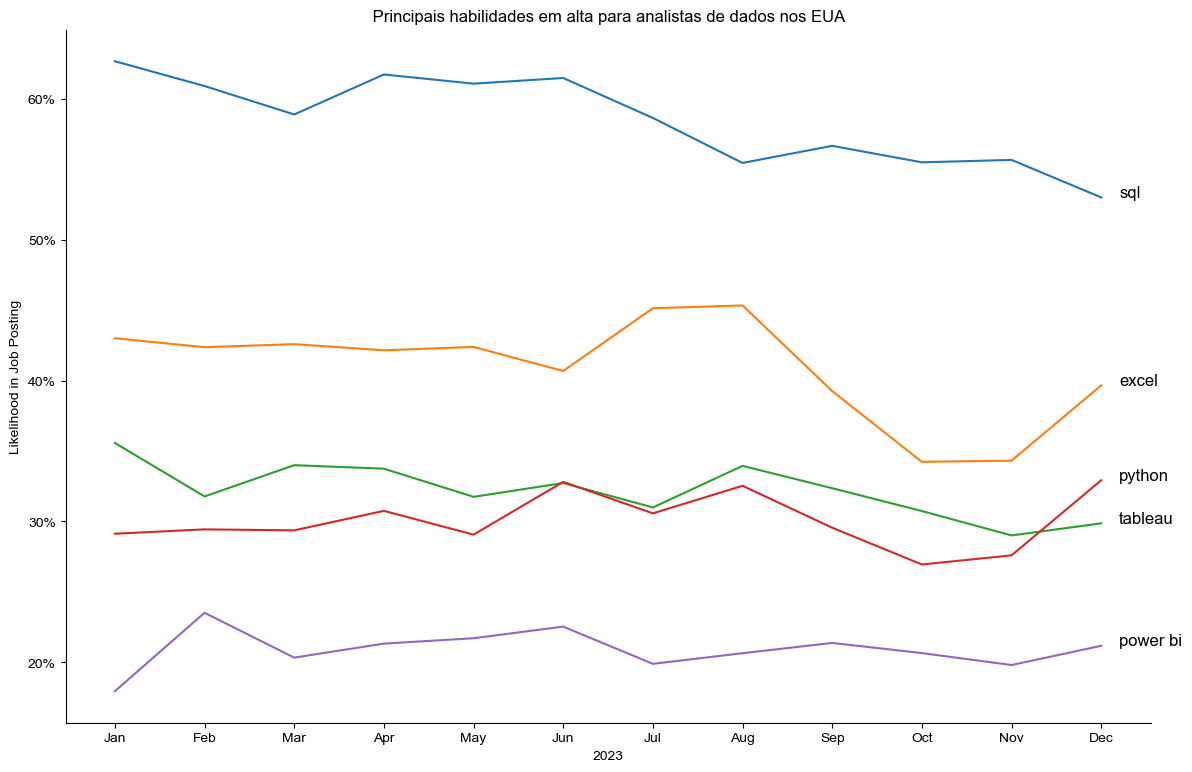

In [17]:
plt.figure(figsize=(14, 9))
proj_grafica = data_DA_EUA_percent.iloc[:, :5]
sns.lineplot(data=proj_grafica, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title(" Principais habilidades em alta para analistas de dados nos EUA ")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel("2023")
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, proj_grafica.iloc[-1, i], proj_grafica.columns[i], color='black')

plt.show